In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [56]:
sen_attr_dict = {
    'adult': 'sex',
    'compas': 'sex',
    'bank': 'age',
    'retiring_adult': 'race',
    'retiring_adult_coverage': 'race'
}

In [61]:
dataset = 'bank'
sen_attr = sen_attr_dict[dataset]
option = 'intersect' # 'fair_only', 'intersect'
k_arr = np.arange(0.1, 1.1, 0.1) # np.arange(0.1, 1.1, 0.1) or np.arange(1, 21, 1)
#k_arr = np.arange(1, 21, 1)
seed_num = 5

In [62]:
# naive

trng_acc_list = np.array([])
trng_fair_list = np.array([])

val_acc_list = np.array([])
val_fair_list = np.array([])

test_acc_list = np.array([])
test_fair_list = np.array([])

for seed in range(seed_num):
    with open(f"./log/fair_only/{dataset}_seed_{seed}_sen_attr_{sen_attr}_naive_log.txt", "rb") as fp:
        log = pickle.load(fp)
        max_idx = np.argmax(np.array(log[0]))
        
        trng_acc_list = np.append(trng_acc_list, log[0][max_idx])
        trng_fair_list = np.append(trng_fair_list, log[1][max_idx])
        val_acc_list = np.append(val_acc_list, log[2][max_idx])
        val_fair_list = np.append(val_fair_list, log[3][max_idx])
        test_acc_list = np.append(test_acc_list, log[4][max_idx])
        test_fair_list = np.append(test_fair_list, log[5][max_idx])
        
naive_trng_acc = np.mean(trng_acc_list)
naive_trng_fair = np.mean(trng_fair_list)
naive_val_acc = np.mean(val_acc_list)
naive_val_fair = np.mean(val_fair_list)
naive_test_acc = np.mean(test_acc_list)
naive_test_fair = np.mean(test_fair_list)
        
print(f"Average Trng Acc: {np.mean(trng_acc_list)}, Average Trng Fair: {np.mean(trng_fair_list)}")
print(f"Average Val Acc: {np.mean(val_acc_list)}, Average Val Fair: {np.mean(val_fair_list)}")
print(f"Average Test Acc: {np.mean(test_acc_list)}, Average Test Fair: {np.mean(test_fair_list)}")
    

Average Trng Acc: 0.9226077423887892, Average Trng Fair: 0.09220430015291517
Average Val Acc: 0.9052480524805248, Average Val Fair: 0.058227236489261466
Average Test Acc: 0.8983601180714988, Average Test Fair: 0.02565827716282232


In [63]:
# Top k Last Epoch

trng_acc_list_by_k = np.array([])
trng_fair_list_by_k = np.array([])
val_acc_list_by_k = np.array([])
val_fair_list_by_k = np.array([])
test_acc_list_by_k = np.array([])
test_fair_list_by_k = np.array([])


for k in k_arr:
    trng_acc_list = np.array([])
    trng_fair_list = np.array([])

    val_acc_list = np.array([])
    val_fair_list = np.array([])

    test_acc_list = np.array([])
    test_fair_list = np.array([])
    
    for seed in range(seed_num):
            with open(f"./log/{option}/{dataset}_seed_{seed}_k_{k:.1f}_sen_attr_{sen_attr}_acc_fair_log.txt", "rb") as fp:
                log = pickle.load(fp)
                idx = 50 - 1

                trng_acc_list = np.append(trng_acc_list, log[0][idx])
                trng_fair_list = np.append(trng_fair_list, log[1][idx])
                val_acc_list = np.append(val_acc_list, log[2][idx])
                val_fair_list = np.append(val_fair_list, log[3][idx])
                test_acc_list = np.append(test_acc_list, log[4][idx])
                test_fair_list = np.append(test_fair_list, log[5][idx])
                
    trng_acc_list_by_k = np.append(trng_acc_list_by_k, np.mean(trng_acc_list))
    trng_fair_list_by_k = np.append(trng_fair_list_by_k, np.mean(trng_fair_list))
    val_acc_list_by_k = np.append(val_acc_list_by_k, np.mean(val_acc_list))
    val_fair_list_by_k = np.append(val_fair_list_by_k, np.mean(val_fair_list))
    test_acc_list_by_k = np.append(test_acc_list_by_k, np.mean(test_acc_list))
    test_fair_list_by_k = np.append(test_fair_list_by_k, np.mean(test_fair_list))  
          
# print(f"Average Trng Acc: {np.mean(trng_acc_list)}, Average Trng Fair: {np.mean(trng_fair_list)}")
# print(f"Average Val Acc: {np.mean(val_acc_list)}, Average Val Fair: {np.mean(val_fair_list)}")
# print(f"Average Test Acc: {np.mean(test_acc_list)}, Average Test Fair: {np.mean(test_fair_list)}")



FileNotFoundError: [Errno 2] No such file or directory: './log/intersect/bank_seed_2_k_1.0_sen_attr_age_acc_fair_log.txt'

ValueError: x and y must be the same size

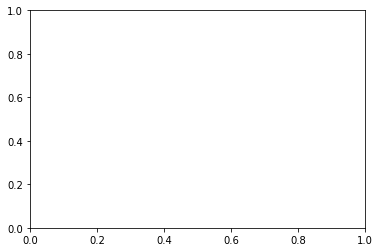

In [60]:
plt.scatter(k_arr, trng_acc_list_by_k)

plt.axhline(y = naive_trng_acc, color='r', linestyle='-')
plt.title("leave_top_k_out trng_acc by k")
plt.show()

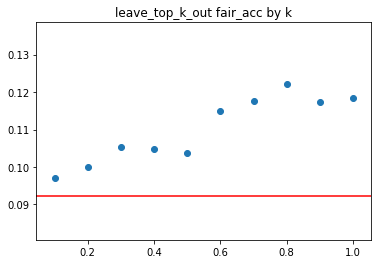

In [36]:
plt.scatter(k_arr, trng_fair_list_by_k)

plt.axhline(y = naive_trng_fair, color='r', linestyle='-')
plt.title("leave_top_k_out fair_acc by k")
plt.show()

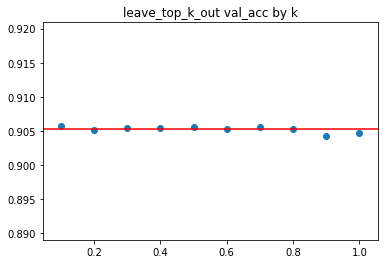

In [37]:
plt.scatter(k_arr, val_acc_list_by_k)

plt.axhline(y = naive_val_acc, color='r', linestyle='-')
plt.title("leave_top_k_out val_acc by k")
plt.show()

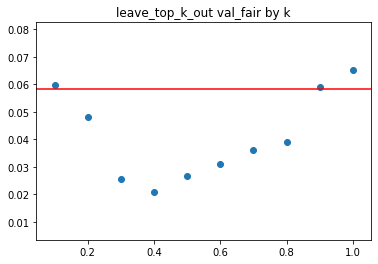

In [38]:
plt.scatter(k_arr, val_fair_list_by_k)

plt.axhline(y = naive_val_fair, color='r', linestyle='-')
plt.title("leave_top_k_out val_fair by k")
plt.show()

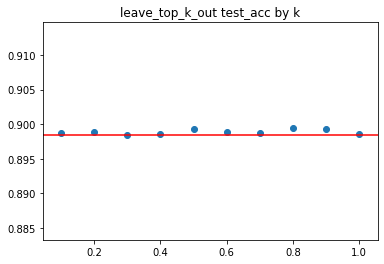

In [39]:
plt.scatter(k_arr, test_acc_list_by_k)

plt.axhline(y = naive_test_acc, color='r', linestyle='-')
plt.title("leave_top_k_out test_acc by k")
plt.show()

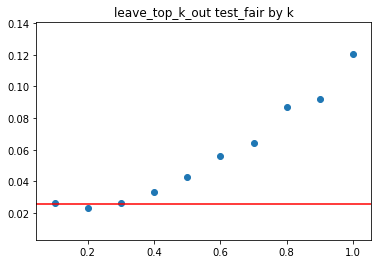

In [40]:
plt.scatter(k_arr, test_fair_list_by_k)

plt.axhline(y = naive_test_fair, color='r', linestyle='-')
plt.title("leave_top_k_out test_fair by k")
plt.show()

In [41]:
# Top k Removed data info

for k in k_arr:
    data_cnt = np.zeros((2, 2))
    for seed in range(seed_num):
        with open(f"./log/{option}/{dataset}_seed_{seed}_k_{k:.1f}_sen_attr_{sen_attr}_removed_data_info.txt", "rb") as fp:
            log = pickle.load(fp).ravel()
            data_cnt[0][0] += log[0]
            data_cnt[0][1] += log[1]
            data_cnt[1][0] += log[2]
            data_cnt[1][1] += log[3]
            
    print("k: {:.1f}\n".format(k), data_cnt / seed_num)

k: 0.1
 [[ 0.  14.2]
 [ 0.   4.8]]
k: 0.2
 [[ 0.  26.4]
 [ 0.  12.6]]
k: 0.3
 [[ 0.  37.2]
 [ 0.4 20.4]]
k: 0.4
 [[ 0.  48.4]
 [ 1.8 27.8]]
k: 0.5
 [[ 0.  59.2]
 [ 3.  34.8]]
k: 0.6
 [[ 0.  70.6]
 [ 5.4 41. ]]
k: 0.7
 [[ 0.  80.8]
 [ 7.6 47.6]]
k: 0.8
 [[ 0.  90.6]
 [11.6 53.8]]
k: 0.9
 [[ 0.  98.6]
 [15.8 60.6]]
k: 1.0
 [[  0.  108.4]
 [ 20.8  65.8]]


In [42]:
# Top k group wise accuracy

# (epoch, trng/val/test, group, 2by2 confusion)

val_tpr_g0_by_k = np.array([])
val_tpr_g1_by_k = np.array([])
test_tpr_g0_by_k = np.array([])
test_tpr_g1_by_k = np.array([])

for k in k_arr:
    val_g0 = np.zeros((2,2))
    val_g1 = np.zeros((2,2))
    test_g0 = np.zeros((2,2))
    test_g1 = np.zeros((2,2))
    for seed in range(seed_num):
        with open(f"./log/{option}/{dataset}_seed_{seed}_k_{k:.1f}_sen_attr_{sen_attr}_confusion_matrix.txt", "rb") as fp:
            log = pickle.load(fp)[50 - 1]
            
            for g in range(2):
                if g == 0:
                    val_g0 += log[1][g]
                    test_g0 += log[2][g]
                elif g == 1:
                    val_g1 += log[1][g]
                    test_g1 += log[2][g]
                    
                    
    val_g0 /= seed_num
    val_g1 /= seed_num
    test_g0 /= seed_num
    test_g1 /= seed_num
    
    val_tpr_g0_by_k = np.append(val_tpr_g0_by_k, val_g0[1][1]/(val_g0[1][0]+val_g0[1][1]))
    val_tpr_g1_by_k = np.append(val_tpr_g1_by_k, val_g1[1][1]/(val_g1[1][0]+val_g1[1][1]))
    test_tpr_g0_by_k = np.append(test_tpr_g0_by_k, test_g0[1][1]/(test_g0[1][0]+test_g0[1][1]))
    test_tpr_g1_by_k = np.append(test_tpr_g1_by_k, test_g1[1][1]/(test_g1[1][0]+test_g1[1][1]))
    

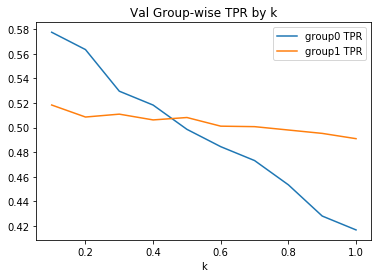

In [43]:
plt.plot(k_arr, val_tpr_g0_by_k, label="group0 TPR")
plt.plot(k_arr, val_tpr_g1_by_k, label="group1 TPR")

plt.legend()
plt.title("Val Group-wise TPR by k")
plt.xlabel("k")
plt.show()

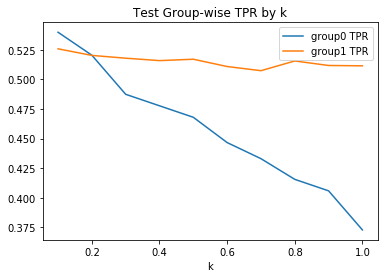

In [44]:
plt.plot(k_arr, test_tpr_g0_by_k, label="group0 TPR")
plt.plot(k_arr, test_tpr_g1_by_k, label="group1 TPR")

plt.legend()
plt.title("Test Group-wise TPR by k")
plt.xlabel("k")
plt.show()

In [45]:
# Bottom k Last Epoch

trng_acc_list_by_k = np.array([])
trng_fair_list_by_k = np.array([])
val_acc_list_by_k = np.array([])
val_fair_list_by_k = np.array([])
test_acc_list_by_k = np.array([])
test_fair_list_by_k = np.array([])


for k in k_arr:
    trng_acc_list = np.array([])
    trng_fair_list = np.array([])

    val_acc_list = np.array([])
    val_fair_list = np.array([])

    test_acc_list = np.array([])
    test_fair_list = np.array([])
    
    for seed in range(seed_num):
            with open(f"./log/{option}/{dataset}_seed_{seed}_bottom_k_{k:.1f}_sen_attr_{sen_attr}_acc_fair_log.txt", "rb") as fp:
                log = pickle.load(fp)
                idx = 50 - 1

                trng_acc_list = np.append(trng_acc_list, log[0][idx])
                trng_fair_list = np.append(trng_fair_list, log[1][idx])
                val_acc_list = np.append(val_acc_list, log[2][idx])
                val_fair_list = np.append(val_fair_list, log[3][idx])
                test_acc_list = np.append(test_acc_list, log[4][idx])
                test_fair_list = np.append(test_fair_list, log[5][idx])
                
    trng_acc_list_by_k = np.append(trng_acc_list_by_k, np.mean(trng_acc_list))
    trng_fair_list_by_k = np.append(trng_fair_list_by_k, np.mean(trng_fair_list))
    val_acc_list_by_k = np.append(val_acc_list_by_k, np.mean(val_acc_list))
    val_fair_list_by_k = np.append(val_fair_list_by_k, np.mean(val_fair_list))
    test_acc_list_by_k = np.append(test_acc_list_by_k, np.mean(test_acc_list))
    test_fair_list_by_k = np.append(test_fair_list_by_k, np.mean(test_fair_list))  
          
# print(f"Average Trng Acc: {np.mean(trng_acc_list)}, Average Trng Fair: {np.mean(trng_fair_list)}")
# print(f"Average Val Acc: {np.mean(val_acc_list)}, Average Val Fair: {np.mean(val_fair_list)}")
# print(f"Average Test Acc: {np.mean(test_acc_list)}, Average Test Fair: {np.mean(test_fair_list)}")



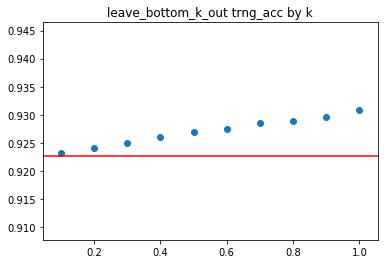

In [46]:
plt.scatter(k_arr, trng_acc_list_by_k)

plt.axhline(y = naive_trng_acc, color='r', linestyle='-')
plt.title("leave_bottom_k_out trng_acc by k")
plt.show()

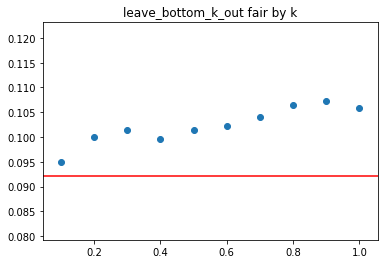

In [47]:
plt.scatter(k_arr, trng_fair_list_by_k)

plt.axhline(y = naive_trng_fair, color='r', linestyle='-')
plt.title("leave_bottom_k_out fair by k")
plt.show()

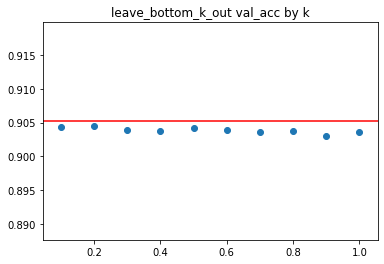

In [48]:
plt.scatter(k_arr, val_acc_list_by_k)

plt.axhline(y = naive_val_acc, color='r', linestyle='-')
plt.title("leave_bottom_k_out val_acc by k")
plt.show()

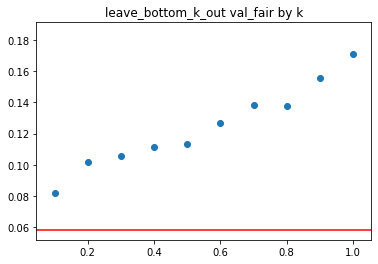

In [49]:
plt.scatter(k_arr, val_fair_list_by_k)

plt.axhline(y = naive_val_fair, color='r', linestyle='-')
plt.title("leave_bottom_k_out val_fair by k")
plt.show()

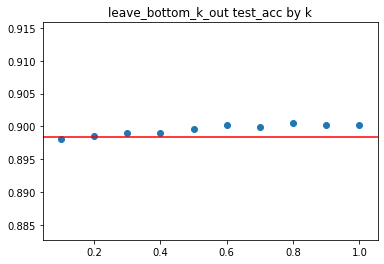

In [50]:
plt.scatter(k_arr, test_acc_list_by_k)

plt.axhline(y = naive_test_acc, color='r', linestyle='-')
plt.title("leave_bottom_k_out test_acc by k")
plt.show()

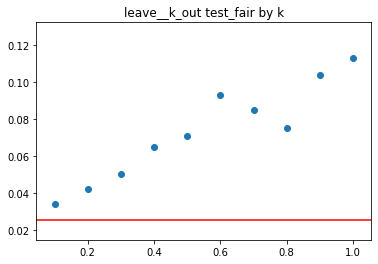

In [51]:
plt.scatter(k_arr, test_fair_list_by_k)

plt.axhline(y = naive_test_fair, color='r', linestyle='-')
plt.title("leave__k_out test_fair by k")
plt.show()

In [52]:
# Bottom k group wise accuracy

# (epoch, trng/val/test, group, 2by2 confusion)

val_tpr_g0_by_k = np.array([])
val_tpr_g1_by_k = np.array([])
test_tpr_g0_by_k = np.array([])
test_tpr_g1_by_k = np.array([])

for k in k_arr:
    val_g0 = np.zeros((2,2))
    val_g1 = np.zeros((2,2))
    test_g0 = np.zeros((2,2))
    test_g1 = np.zeros((2,2))
    for seed in range(seed_num):
        with open(f"./log/{option}/{dataset}_seed_{seed}_bottom_k_{k:.1f}_sen_attr_{sen_attr}_confusion_matrix.txt", "rb") as fp:
            log = pickle.load(fp)[50 - 1]
            
            for g in range(2):
                if g == 0:
                    val_g0 += log[1][g]
                    test_g0 += log[2][g]
                elif g == 1:
                    val_g1 += log[1][g]
                    test_g1 += log[2][g]
                    
                    
    val_g0 /= seed_num
    val_g1 /= seed_num
    test_g0 /= seed_num
    test_g1 /= seed_num
    
    val_tpr_g0_by_k = np.append(val_tpr_g0_by_k, val_g0[1][1]/(val_g0[1][0]+val_g0[1][1]))
    val_tpr_g1_by_k = np.append(val_tpr_g1_by_k, val_g1[1][1]/(val_g1[1][0]+val_g1[1][1]))
    test_tpr_g0_by_k = np.append(test_tpr_g0_by_k, test_g0[1][1]/(test_g0[1][0]+test_g0[1][1]))
    test_tpr_g1_by_k = np.append(test_tpr_g1_by_k, test_g1[1][1]/(test_g1[1][0]+test_g1[1][1]))
    

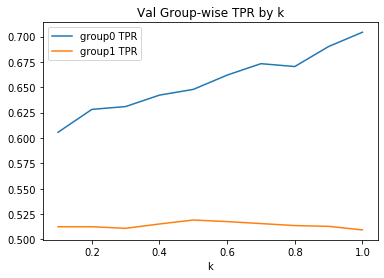

In [53]:
plt.plot(k_arr, val_tpr_g0_by_k, label="group0 TPR")
plt.plot(k_arr, val_tpr_g1_by_k, label="group1 TPR")

plt.legend()
plt.title("Val Group-wise TPR by k")
plt.xlabel("k")
plt.show()

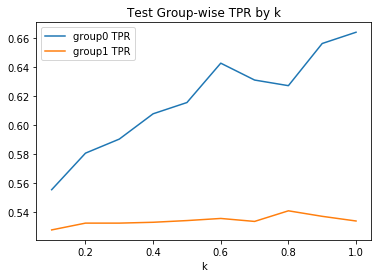

In [54]:
plt.plot(k_arr, test_tpr_g0_by_k, label="group0 TPR")
plt.plot(k_arr, test_tpr_g1_by_k, label="group1 TPR")

plt.legend()
plt.title("Test Group-wise TPR by k")
plt.xlabel("k")
plt.show()